In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
from typing import Dict
from acctrack.io.athena_raw_root import AthenaRawRootReader
from acctrack.utils.utils_plot import add_mean_std, create_figure
from acctrack.io import utils_athena_raw_root as utils_raw_root
from acctrack.task.convert_gnn_tracks_for_fitting import ConvertGNNTracksForFitting

import awkward as ak
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
from pathlib import Path

In [45]:
bug_fixed_2023_data_dir = "/media/DataOcean/data/ITk/BugFixedSamples"
bug_fixed_2023_filename = bug_fixed_2023_data_dir + "/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3770_s3773_r14429__J001.root"

redumped_2022_data_dir = "/media/DataOcean/data/ITk/ReDumped2022Data"
redumped_2022_filename = redumped_2022_data_dir + "/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J006.root"

In [70]:
bug_fixed_2023_reader = AthenaRawRootReader(bug_fixed_2023_data_dir)
redumped_2022_reader = AthenaRawRootReader(redumped_2022_data_dir)

/media/DataOcean/data/ITk/BugFixedSamples contains  1 files and total 200 events.
Error reading file: /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J052.root
/media/DataOcean/data/ITk/ReDumped2022Data contains  6 files and total 3000 events.


In [ ]:
base_dir = Path("/home/xju/projects/tracking/integrateToAthena/run_21.9.26/RunAlexisInputs")
file_reco = base_dir / "trackReco_singleCutFilter-wrangler_events_1681-1780_thr.h5"
evtid_matching_fname = base_dir / "correspondence.txt"
rdo_matching_fname = base_dir / "ttbar_job_inputfiles.txt"

In [ ]:
evtid_map_to_event_number = pd.read_csv(evtid_matching_fname, sep='\s+', header=None,
                       names=["evtID", "orgEvtID", "rdoEvtID"])
requested_event_numbers = np.sort(evtid_map_to_event_number.iloc[1681:1780].rdoEvtID.values)

In [75]:
requested_event_numbers

array([22222, 22241, 22249, 22256, 22266, 22272, 22295, 22320, 22339,
       22389, 24222, 24239, 24250, 24253, 24283, 24312, 24314, 24359,
       24419, 25223, 25232, 25235, 25274, 25277, 25290, 25293, 25321,
       25332, 25362, 26221, 26234, 26241, 26242, 26260, 26269, 26274,
       26278, 26296, 26303, 27141, 27153, 27166, 27181, 27197, 27200,
       27216, 27228, 27243, 27273, 28145, 28153, 28166, 28176, 28199,
       28200, 28205, 28207, 28228, 28234, 28652, 28657, 28666, 28668,
       28676, 28703, 28728, 28757, 28759, 28793, 29151, 29153, 29161,
       29173, 29180, 29191, 29211, 29231, 29262, 29299, 29651, 29656,
       29673, 29676, 29689, 29704, 29706, 29733, 29754, 29755, 87451,
       87457, 87462, 87467, 87484, 87490, 87509, 87520, 87527, 87571])

In [71]:
event_to_root_map = redumped_2022_reader.find_event(requested_event_numbers)

reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J001.root
reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J006.root
reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J044.root
reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J045.root
reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J050.root
reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8E

In [78]:
evt_info = redumped_2022_reader.get_event_info(4)

reading event info from /media/DataOcean/data/ITk/ReDumped2022Data/GNN4Itk__mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.recon.RDO.e8185_s3595_s3600_r12401__J050.root


In [79]:
np.min(evt_info.event_number), np.max(evt_info.event_number), 

(30661, 31160)

In [25]:
evt_info

,run_number,event_number
0,242020,3633
1,242020,3621
2,242020,3651
3,242020,3649
4,242020,3659
...,...,...
495,242020,4087
496,242020,4092
497,242020,4094
498,242020,4105


In [7]:
rdo_info = pd.read_csv(
    rdo_matching_fname, sep='\s+', header=None,
    names=["rodNum", "rdoFileName"])

In [17]:
rdo_info[['rdoFileName', 'rodNum']].to_csv("rdo_matching.csv", sep='\t', header=None, index=False)

In [64]:
evtid_map_to_event_number

,evtID,orgEvtID,rdoEvtID
0,1,242020,7
1,2,242020,20
2,3,242020,25
3,4,242020,30
4,5,242020,59
...,...,...,...
1975,1976,242020,70511
1976,1977,242020,70539
1977,1978,242020,70545
1978,1979,242020,70541


In [19]:
evtid_map_to_event_number.to_csv("evtid_matching.csv", sep="\t", header=None, index=False)

In [41]:
rdo_evt_ids

In [11]:
evt_number_map = dict(zip(
    evt_info.evtID.values.tolist(),
    evt_info.rdoEvtID.values.tolist()))

In [12]:
recoTracks = [dict() for i in range(0, 1800)]
methods = ["singleCutFilter", "wrangler"]
print("Getting reco tracks from file") 
# taken from https://gitlab.cern.ch/gnn4itkteam/tracks_reconstruction/-/blob/master/truthMatch.py#L59
with pd.HDFStore(file_reco, mode='r') as reader:
    for eventId in range(1681, 1780):
        for m in methods:
            dataname = "/event{0}/{1}/reco_tracks".format(eventId, m)
            df_trks = reader.get(dataname)
            # Remove -1 that are placeholders for empty hit
            trks = df_trks.values
            trks = [list(filter(lambda x: x !=-1, trk)) for trk in trks]

            recoTracks[eventId].update( { m : trks })

Getting reco tracks from file


In [15]:
recoTracks[1681]

{'singleCutFilter': [[18183,
   54398,
   66579,
   96,
   273,
   18092,
   73415,
   66533,
   18009,
   219,
   54351,
   157,
   54307,
   334,
   17925],
  [274, 18083, 160, 335, 98, 18004, 18174, 222, 17922],
  [18077,
   54341,
   54388,
   17996,
   18168,
   324,
   390,
   142,
   266,
   73433,
   210,
   54436,
   18272,
   66751],
  [54509,
   18140,
   66761,
   18246,
   143,
   209,
   18360,
   54460,
   1063,
   319,
   54410,
   262,
   66582,
   380,
   18053],
  [53467, 16840, 156, 53510, 47683, 16786, 16905, 47558, 47619],
  [66511,
   54368,
   66697,
   18015,
   66546,
   54284,
   18103,
   54325,
   17931,
   73402,
   203,
   325,
   66737,
   264],
  [17981, 66668, 102352, 19537, 54275, 17897, 73482, 66693],
  [18531,
   400,
   18653,
   18420,
   518,
   19828,
   458,
   54614,
   1248,
   584,
   338,
   18321,
   54535],
  [543,
   18481,
   18474,
   18601,
   19898,
   681,
   18277,
   18379,
   20070,
   616,
   484,
   19985,
   18806,
   18908,
 

In [14]:
import os
def track_candidate_writer(
    evtid: int,
    evtid_map: dict, reco_tracks: dict,
    processed_data_dir: str,
    method: str = "wrangler",
    outdir: str = None):
    """Create a function that writes tracking candidates to a text file.
    Arg:
        evtid: event ID used in GNN
        evtid_map: maping the event ID used in GNN to the event ID in RDO file
        reco_tracks: a dictionary containing all track candidates
        processed_data_dir: processed data information
        method: graph segmenetation algorithm
        outdir: output directory for track candidate text files
        
    Return:
        writer_fn: the writer function that takes event id as input
    """
    try:
        real_evtid = evtid_map[evtid]
    except KeyError:
        print("event id {} not there".format(evtid))
        return 
    
    outname = f"tracks_{real_evtid}.txt"
    if outdir is not None:
        outname = os.path.join(outdir, outname)

    # read processed data info
    # use that to sort the track candidates
    truth_fname = os.path.join(processed_data_dir, f"event{evtid:09}-truth.csv")
    if not os.path.exists(truth_fname):
        print(f"{evtid} does not have processed data")
        return
    truth = pd.read_csv(truth_fname)
            
    methods = ['singleCutFilter', 'wrangler']
    with open(outname, 'w') as f:
        for method in methods:
            for track in reco_tracks[evtid][method]:
                track_info = truth[truth['hit_id'].isin(track)]

                # remove duplicated spacepoints
                track_info = track_info.drop_duplicates(subset='hit_id')

                # sort by r direction
                track_info['r'] = np.sqrt(track_info.x**2 + track_info.y**2)
                track_info = track_info.sort_values(by='r')

                f.write(','.join([str(i) for i in track_info.hit_id.values.tolist()]))
                f.write("\n")

In [ ]:


converter = ConvertGNNTracksForFitting(
    base_dir / "ttbar_job_inputfiles.txt",
    base_dir / "ttbar_job_inputfiles.txt", 
)

In [4]:
bug_fixed_2023_reader.read()
redumped_2022_reader.read()

True

In [45]:
list(vars(bug_fixed_2023_reader).keys())

['inputdir',
 'outdir',
 'name',
 'overwrite',
 'tree_name',
 'root_files',
 'num_files',
 'file_evtid',
 'clusters',
 'particles',
 'spacepoints',
 'truth']

In [5]:
bug_fixed_2023_reader.truth.columns

Index(['hit_id', 'x', 'y', 'z', 'cluster_index_1', 'cluster_index_2',
       'particle_id', 'cluster_x_1', 'cluster_y_1', 'cluster_z_1',
       'barrel_endcap', 'layer_disk', 'eta_module', 'phi_module',
       'pixel_count', 'charge_count', 'loc_eta', 'loc_phi', 'loc_direction1',
       'loc_direction2', 'loc_direction3', 'glob_eta', 'glob_phi', 'eta_angle',
       'phi_angle', 'norm_x', 'norm_y', 'norm_z', 'hardware', 'subevent',
       'barcode', 'cluster_x_2', 'cluster_y_2', 'cluster_z_2', 'region'],
      dtype='object')

In [6]:
bug_fixed_2023_reader.particles.columns

Index(['particle_id', 'subevent', 'barcode', 'px', 'py', 'pz', 'pt', 'eta',
       'vx', 'vy', 'vz', 'radius', 'status', 'charge', 'pdg_id', 'passed',
       'vProdNin', 'vProdNout', 'vProdStatus', 'vProdBarcode'],
      dtype='object')

In [6]:
def frac_clusters_with_no_truth(reader):
    frac = reader.clusters[np.isnan(reader.clusters["subevent"])].shape[0] / reader.clusters.shape[0]
    return frac

In [7]:
frac_clusters_with_no_truth(bug_fixed_2023_reader)

0.5687930245590224

In [8]:
frac_clusters_with_no_truth(redumped_2022_reader)

0.5542188353991419

In [109]:
def study_cluster_features(reader):
    clusters = reader.clusters
    print("Number of clusters: ", clusters.shape[0])
    pixel_clusters = clusters[clusters["hardware"] == "PIXEL"]
    strip_clusters = clusters[clusters["hardware"] == "STRIP"]
    print("Number of pixel clusters: ", pixel_clusters.shape[0])
    print("Number of strip clusters: ", strip_clusters.shape[0])
    
    # number of pixels per cluster
    fig, ax = create_figure()
    config = dict(bins=31, range=(-0.5, 30.5), histtype="step", lw=2, alpha=0.8)
    ax.hist(pixel_clusters["pixel_count"], label="Pixel clusters", **config)
    ax.hist(strip_clusters["pixel_count"], label="Strip clusters", **config)
    ax.set_xlabel("# of Pixels per cluster")
    plt.legend()
    plt.show()
    
    # number of charges per cluster
    print("Charge information is not available for strip clusters")
    _, ax = create_figure()
    config = dict(bins=51, range=(-0.5, 50.5), histtype="step", lw=2)
    ax.hist(pixel_clusters["charge_count"], label="Pixel clusters", **config)
    ax.set_xlabel("# of Charges per cluster")
    add_mean_std(pixel_clusters["charge_count"], 15, 15000, ax, dy=2500)
    plt.legend()
    plt.show()

    # cluster position
    _, ax = create_figure()
    config = dict(bins=600, range=(-3000, 3000), histtype="step", lw=2, alpha=0.8)
    ax.hist(pixel_clusters["cluster_x"], label="pixel x", **config)
    ax.hist(pixel_clusters["cluster_y"], label="pixel y", **config)
    ax.hist(pixel_clusters["cluster_z"], label="pixel z", **config)
    ax.hist(strip_clusters["cluster_x"], label="strip x", **config, linestyle="--")
    ax.hist(strip_clusters["cluster_y"], label="strip y", **config, linestyle="--")
    ax.hist(strip_clusters["cluster_z"], label="strip z", **config, linestyle="--")
    ax.set_xlabel("Cluster position [mm]")
    plt.legend()
    plt.show()

    # local directions of clusters
    _, ax = create_figure()
    config = dict(bins=50, range=(0, 30.0), histtype="step", lw=2, alpha=0.8)
    ax.hist(pixel_clusters["loc_direction1"], label="pixel x", **config)
    ax.hist(pixel_clusters["loc_direction2"], label="pixel y", **config)
    ax.hist(pixel_clusters["loc_direction3"], label="pixel z", **config)
    ax.hist(strip_clusters["loc_direction1"], label="strip x", **config, linestyle="--")
    ax.hist(strip_clusters["loc_direction2"], label="strip y", **config, linestyle="--")
    ax.hist(strip_clusters["loc_direction3"], label="strip z", **config, linestyle="--")
    ax.set_xlabel("Local direction")
    plt.legend()
    plt.show()

    # eta/phi from local/global directions of clusters
    _, ax = create_figure()
    config = dict(bins=50, range=(-3.15, 3.15), histtype="step", lw=2, alpha=0.8)
    ax.hist(pixel_clusters["loc_eta"], label=r"local $\eta$", **config)
    ax.hist(pixel_clusters["loc_phi"], label=r"local $\phi$", **config)
    ax.hist(pixel_clusters["glob_eta"], label=r"global $\eta$", **config, linestyle="--")
    ax.hist(pixel_clusters["glob_phi"], label=r"global $\phi$", **config, linestyle="--")
    ax.set_xlabel("Cluster direction")
    plt.legend()
    plt.show()



Number of clusters:  389022
Number of pixel clusters:  202452
Number of strip clusters:  186570


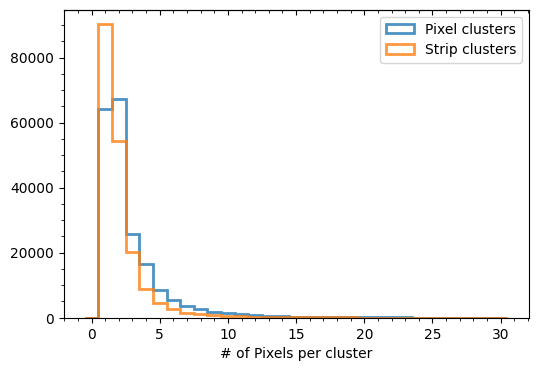

Charge information is not available for strip clusters


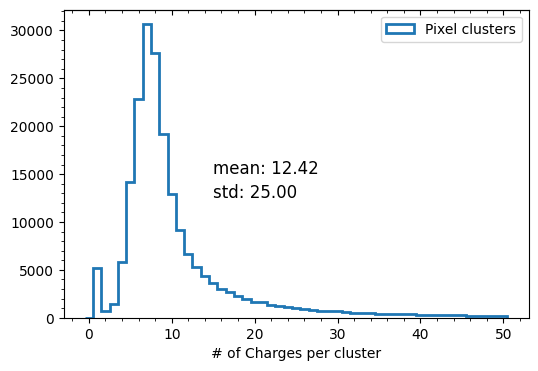

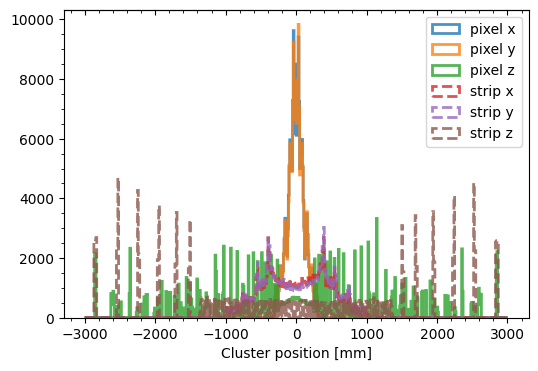

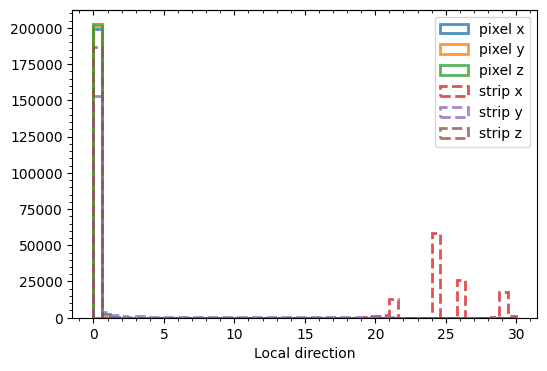

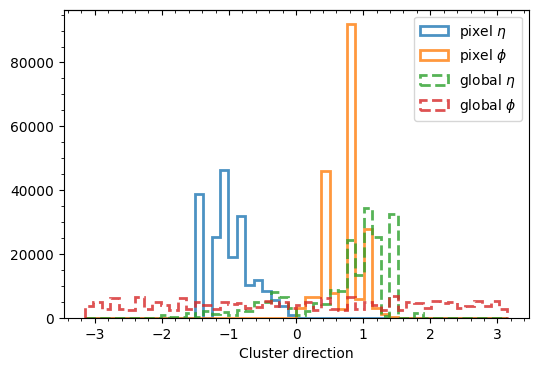

In [110]:
study_cluster_features(bug_fixed_2023_reader)

In [6]:
clusters = bug_fixed_2023_reader.clusters
print("Number of clusters: ", clusters.shape[0])
pixel_clusters = clusters[clusters["hardware"] == "PIXEL"]
strip_clusters = clusters[clusters["hardware"] == "STRIP"]
print("Number of pixel clusters: ", pixel_clusters.shape[0])
print("Number of strip clusters: ", strip_clusters.shape[0])

Number of clusters:  389022
Number of pixel clusters:  202452
Number of strip clusters:  186570


In [82]:
clusters.iloc[1]

cluster_id               1
cluster_x          -33.925
cluster_y            -7.55
cluster_z           -265.0
barrel_endcap           -2
layer_disk               0
eta_module               0
phi_module               0
side                     0
pixel_count              4
charge_count          26.0
loc_eta            -0.7575
loc_phi           0.588003
loc_direction1        0.15
loc_direction2         0.1
loc_direction3        0.15
glob_eta            0.7575
glob_phi         -2.158799
eta_angle         0.982794
phi_angle         0.785398
norm_x                 0.0
norm_y                 0.0
norm_z                -1.0
hardware             PIXEL
subevent               NaN
barcode                NaN
particle_id           None
Name: 1, dtype: object

In [81]:
np.tan(1.249046)

3.000002276019011

In [79]:
clusters[clusters.hardware == "STRIP"].iloc[0]

cluster_id            202009
cluster_x        -392.021782
cluster_y          39.338955
cluster_z          -1501.251
barrel_endcap             -2
layer_disk                 0
eta_module                 0
phi_module                 0
side                       0
pixel_count                1
charge_count             0.0
loc_eta            -0.012316
loc_phi             0.002921
loc_direction1      25.98075
loc_direction2      0.075878
loc_direction3          0.32
glob_eta            0.012316
glob_phi           -1.577217
eta_angle           1.337978
phi_angle           0.012316
norm_x                   0.0
norm_y                   0.0
norm_z                  -1.0
hardware               STRIP
subevent                 NaN
barcode                  NaN
particle_id             None
Name: 202452, dtype: object

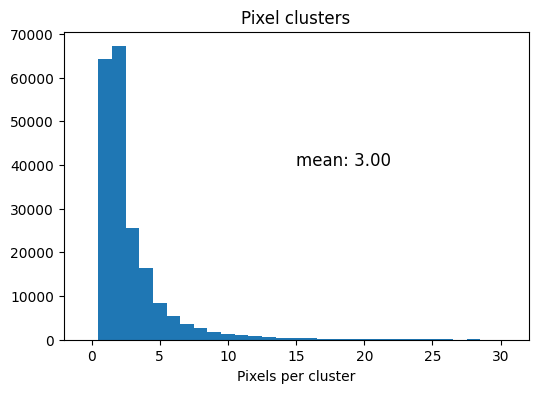

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title("Pixel clusters")
ax.hist(pixel_clusters["pixel_count"], bins=31, range=(-0.5, 30.5))
ax.set_xlabel("# of Pixels per cluster")
add_mean_std(pixel_clusters["pixel_count"], 15, 40000, ax, dy=5000, with_std=False)
plt.show()

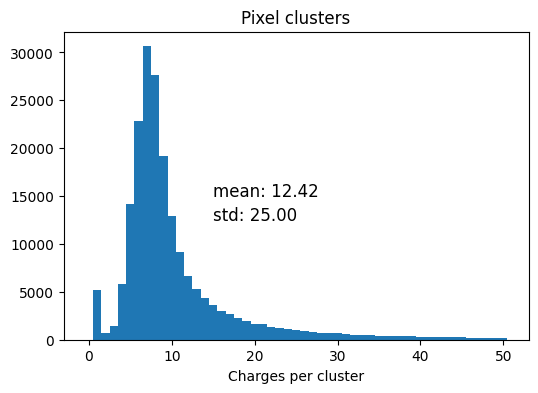

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title("Pixel clusters")
ax.hist(pixel_clusters["charge_count"], bins=51, range=(-0.5, 50.5))
ax.set_xlabel("Charges per cluster")
add_mean_std(pixel_clusters["charge_count"], 15, 15000, ax, dy=2500, with_std=True)
plt.show()

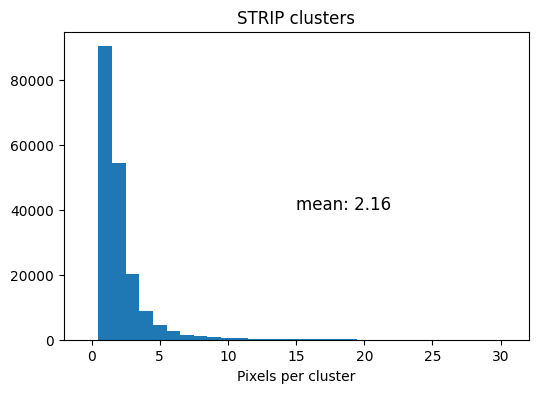

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title("STRIP clusters")
ax.hist(strip_clusters["pixel_count"], bins=31, range=(-0.5, 30.5))
ax.set_xlabel("# of Pixels per cluster")
add_mean_std(strip_clusters["pixel_count"], 15, 40000, ax, dy=5000, with_std=False)
plt.show()

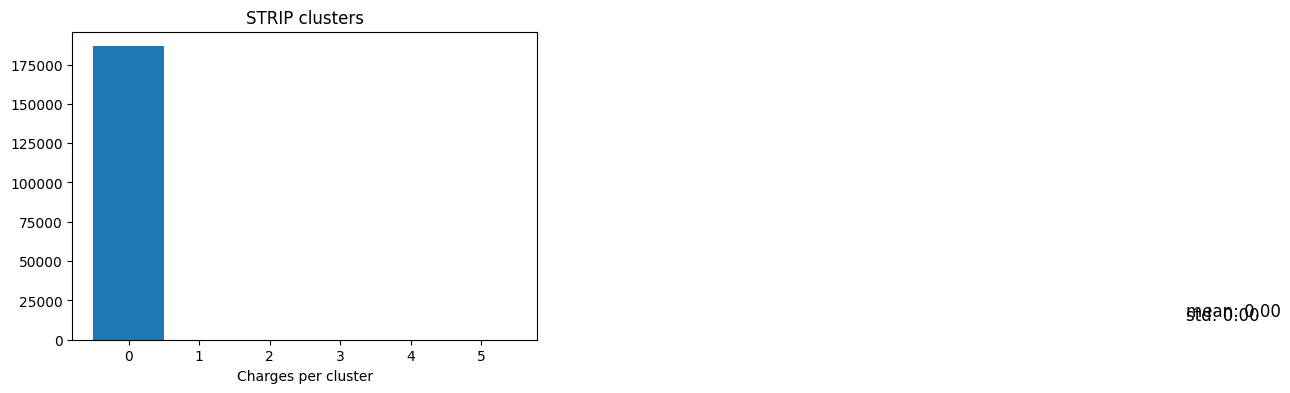

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title("STRIP clusters")
ax.hist(strip_clusters["charge_count"], bins=6, range=(-0.5, 5.5))
ax.set_xlabel("Charges per cluster")
add_mean_std(strip_clusters["charge_count"], 15, 15000, ax, dy=2500, with_std=True)
plt.show()

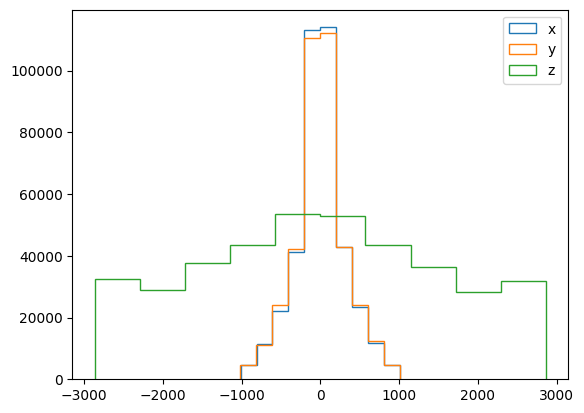

In [50]:
plt.hist(clusters.cluster_x, histtype='step', label="x")
plt.hist(clusters.cluster_y, histtype='step', label="y")
plt.hist(clusters.cluster_z, histtype='step', label="z")
plt.legend()

(array([210711.,      0.,      0.,      0.,      0., 121938.,      0.,
             0.,      0.,  56373.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fdd5d5b3700>])

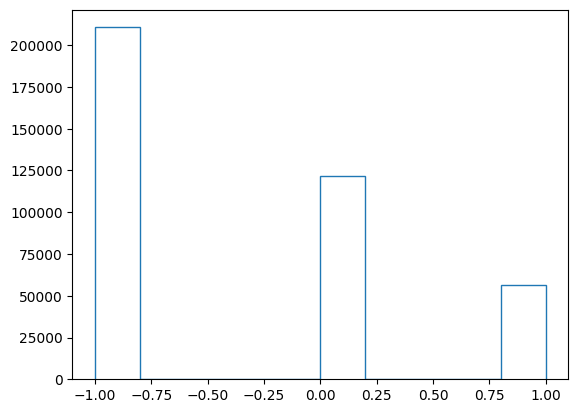

In [51]:
plt.hist(clusters.norm_z, histtype='step', label="norm_z")

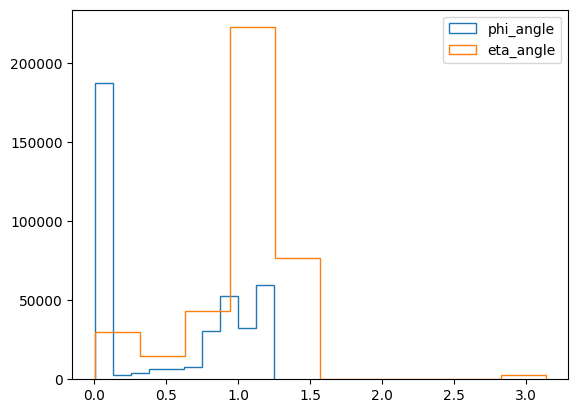

In [55]:
plt.hist(clusters.phi_angle, histtype='step', label="phi_angle")
plt.hist(clusters.eta_angle, histtype='step', label="eta_angle")

plt.legend()

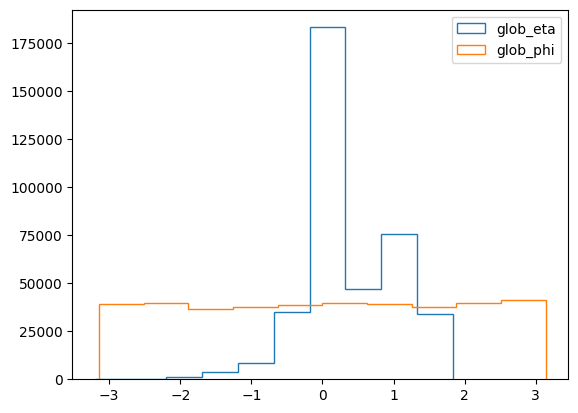

In [56]:
plt.hist(clusters.glob_eta, histtype='step', label="glob_eta")
plt.hist(clusters.glob_phi, histtype='step', label="glob_phi")

plt.legend()

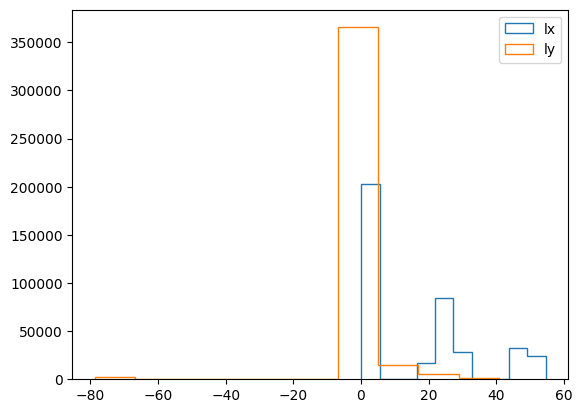

In [85]:
plt.hist(clusters.loc_direction1, histtype='step', label="lx")
plt.hist(clusters.loc_direction2, histtype='step', label="ly")

plt.legend()

In [10]:
particles = bug_fixed_2023_reader.particles    
results = particles[(particles.eta.abs() < 4)
                    & (particles.radius < 260)
                    & (particles.charge.abs() > 0)]

In [11]:
np.unique(bug_fixed_2023_reader.clusters["barrel_endcap"]), np.unique(bug_fixed_2023_reader.clusters["hardware"])

(array([-2,  0,  2], dtype=int32), array(['PIXEL', 'STRIP'], dtype=object))

In [12]:
region_labels = dict([(1, {"hardware": "PIXEL", "barrel_endcap": -2}),
                        (2, {"hardware": "STRIP", "barrel_endcap": -2}),
                        (3, {"hardware": "PIXEL", "barrel_endcap": 0}),
                        (4, {"hardware": "STRIP", "barrel_endcap": 0}),
                        (5, {"hardware": "PIXEL", "barrel_endcap": 2}),
                        (6, {"hardware": "STRIP", "barrel_endcap": 2})
                        ])

In [13]:
region_labels

{1: {'hardware': 'PIXEL', 'barrel_endcap': -2},
 2: {'hardware': 'STRIP', 'barrel_endcap': -2},
 3: {'hardware': 'PIXEL', 'barrel_endcap': 0},
 4: {'hardware': 'STRIP', 'barrel_endcap': 0},
 5: {'hardware': 'PIXEL', 'barrel_endcap': 2},
 6: {'hardware': 'STRIP', 'barrel_endcap': 2}}